# Предсказание вероятности возникновения сердечного приступа на основе датасета Kaggle

## Описание полей

* age - возраст пациента
* sex - пол пациента (0 = муж; 1 = жен)
* exang - стенокардия (клинический синдром, проявляющийся чувством стеснения или сжимающей давящей болью в грудной клетке), вызванная физической нагрузкой (1 = да; 0 = нет)
* ca - количество крупных сосудов у пациента (0-3)
* cp - тип боли в груди (1 = типичная стенокардия; 2 = атипичная стенокардия; 3 = неангинозная боль; 4 = бессимптомный)
* trtbps - артериальное давление в покое (в мм рт. ст.)
* chol - холестерин в мг/дл, полученный с помощью датчика ИМТ
* fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = да; 0 = нет)
* restecg - результаты электрокардиографии в покое (0 = норма; 1 = наличие аномалии ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ); 2 = указание на возможную или определенную гипертрофию левого желудочка по критериям Эстеса)
* thalach - максимально достигнутая частота сердечных сокращений пациента

Target: 0 = низкая вероятность возникновения сердечного приступа; 1 = высокая вероятность возникновения сердечного приступа

## Импорты библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
sns.set_context("poster")
warnings.filterwarnings("ignore")

## Чтение данных

### Получение данных из файла

In [2]:
df = pd.read_csv("heart.csv", delimiter=",")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Информация о размерах таблицы

In [3]:
print("Число строк: ", df.shape[0])
print("Число колонок: ", df.shape[1])

Число строк:  303
Число колонок:  14


### Число null значений в датасете по колонкам

In [4]:
print(round(df.isnull().sum() * 100/df.shape[0]))

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64


## Поиск аномалий в данных

### Гистограммы данных

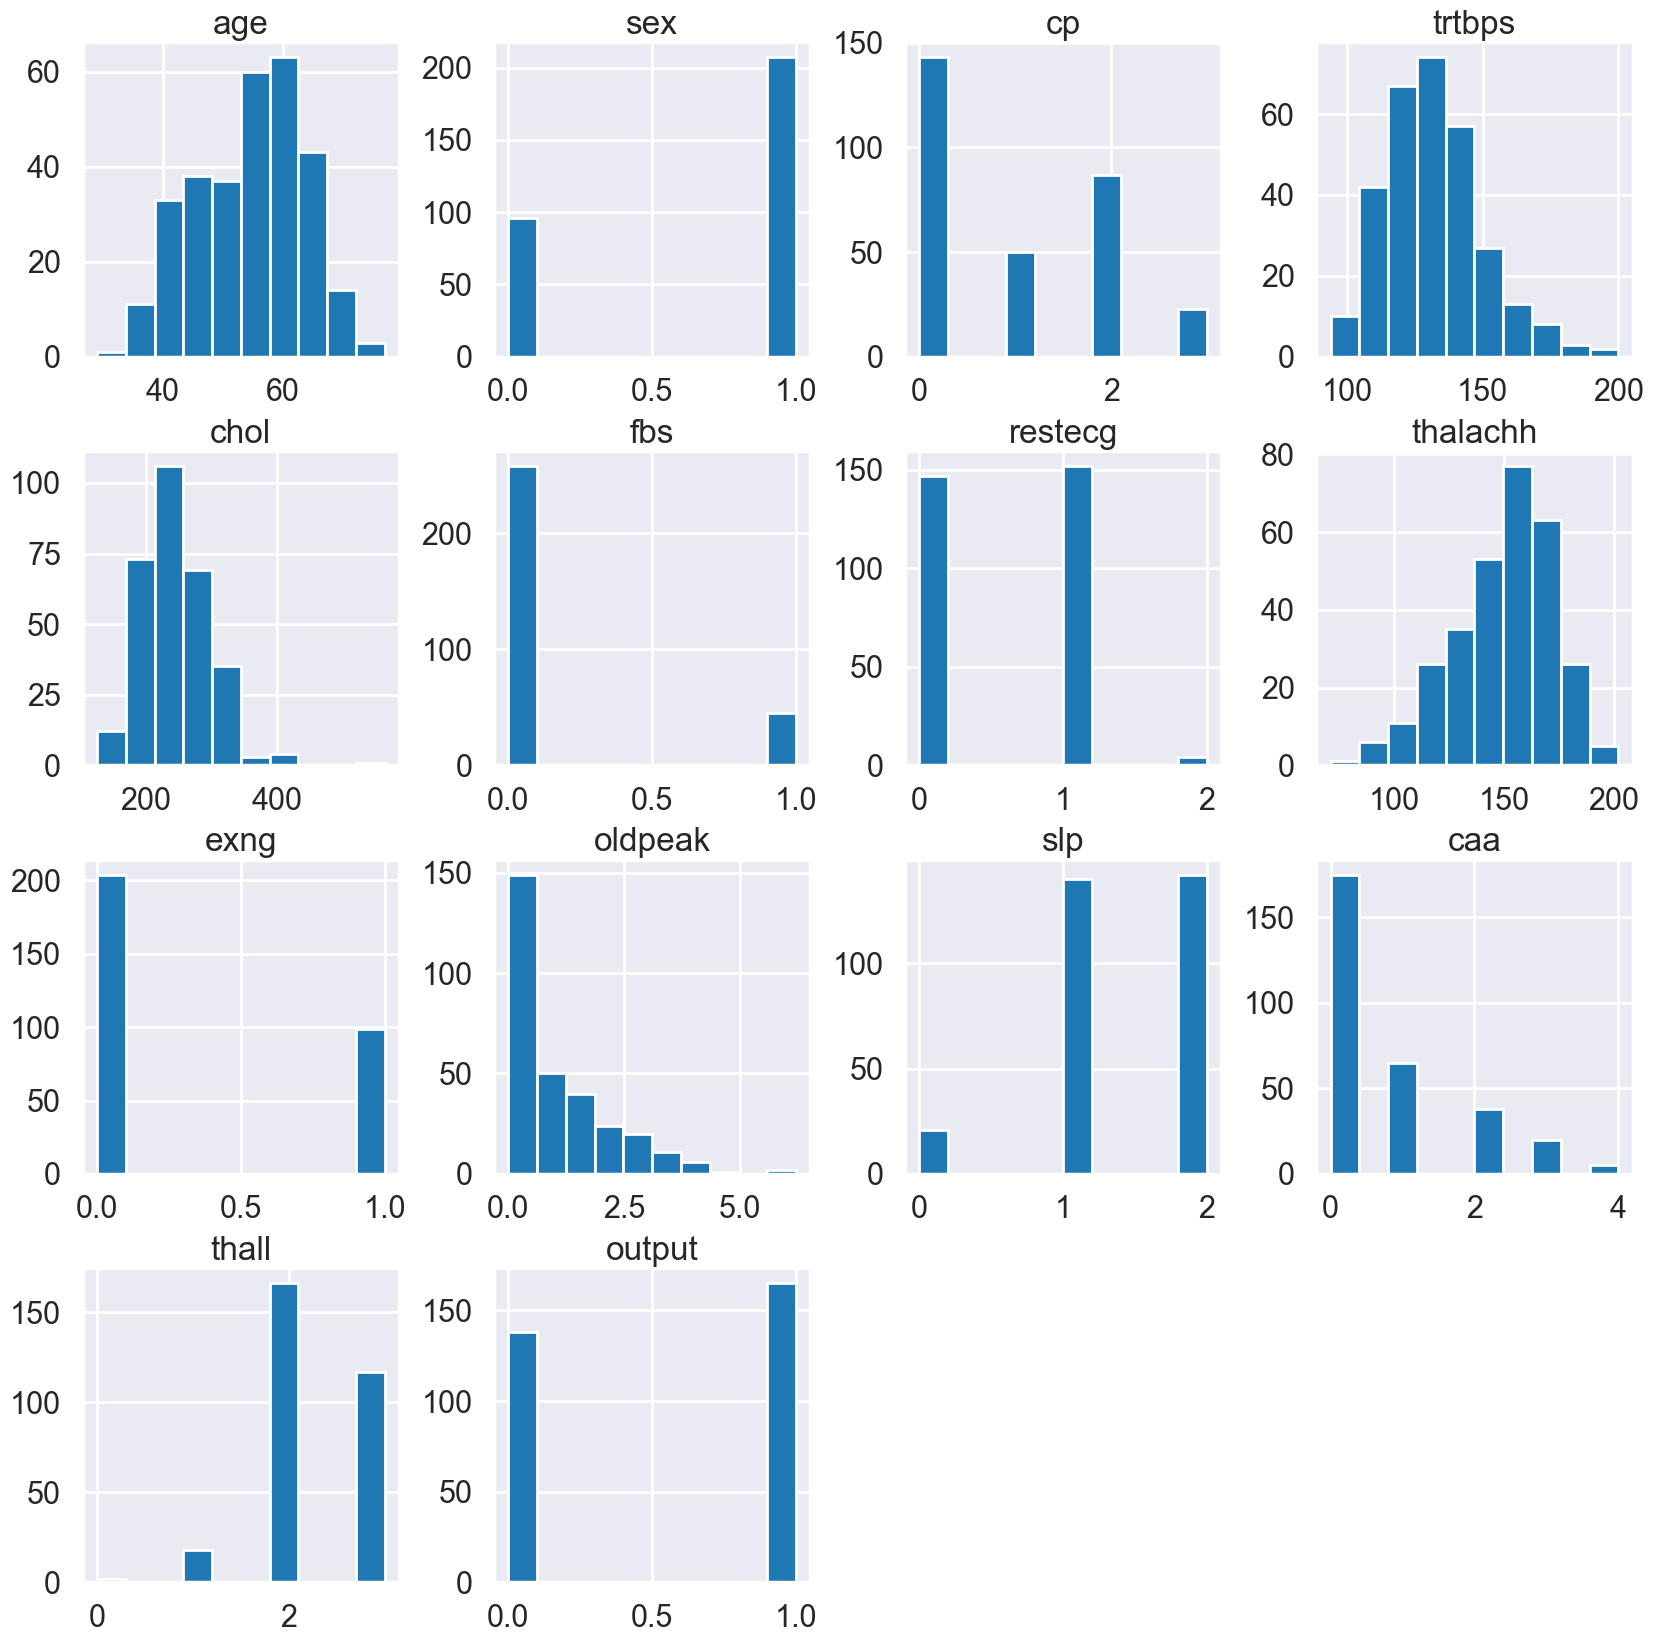

In [5]:
df.hist(figsize=(20,20))
plt.show();

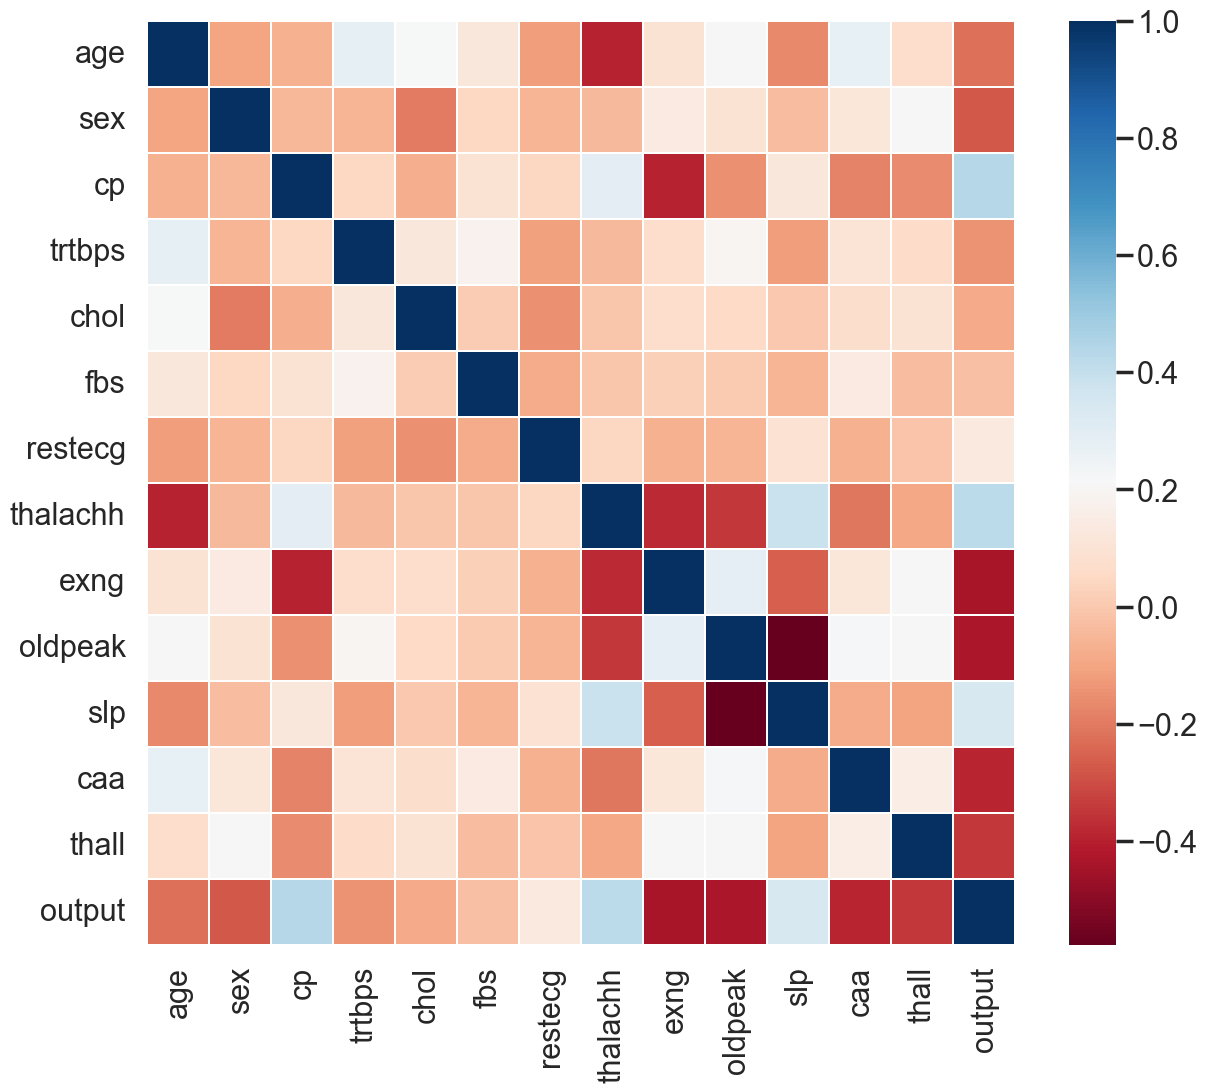

In [6]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(14,12))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu")

### Выбросы в колонке "Возраст"

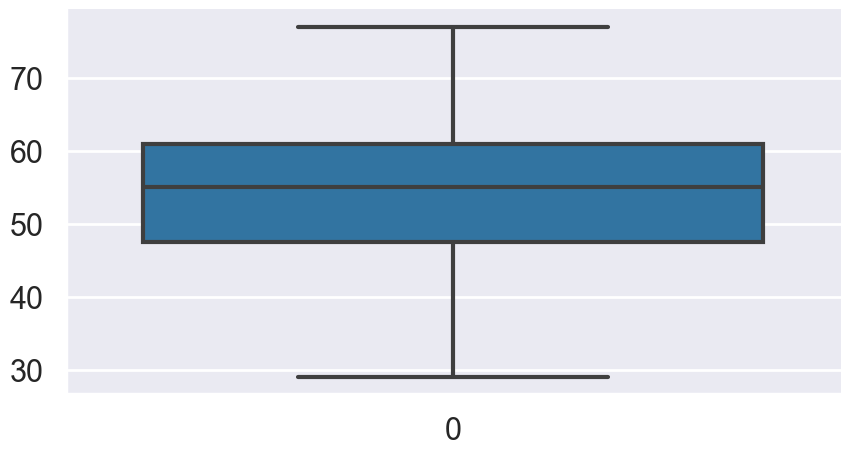

In [7]:
plt.figure(figsize=[10, 5])
sns.boxplot(df['age'])
sns.despine()
plt.show()

### Кто больше подвержен риску относительно пола

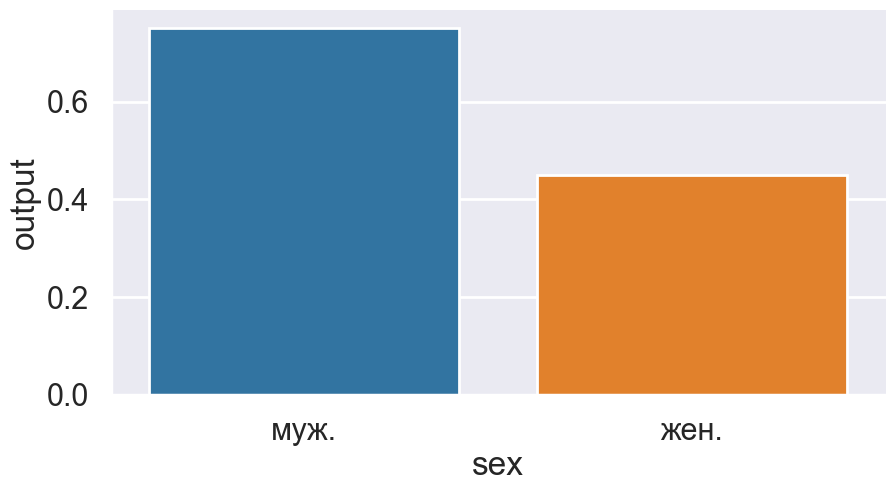

In [8]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["sex"], y = df["output"], ci=0)
plt.xticks(ticks=[0,1], labels=['муж.','жен.'])
sns.despine()
plt.show()

### Наличие выбросов в показателях артериального давления

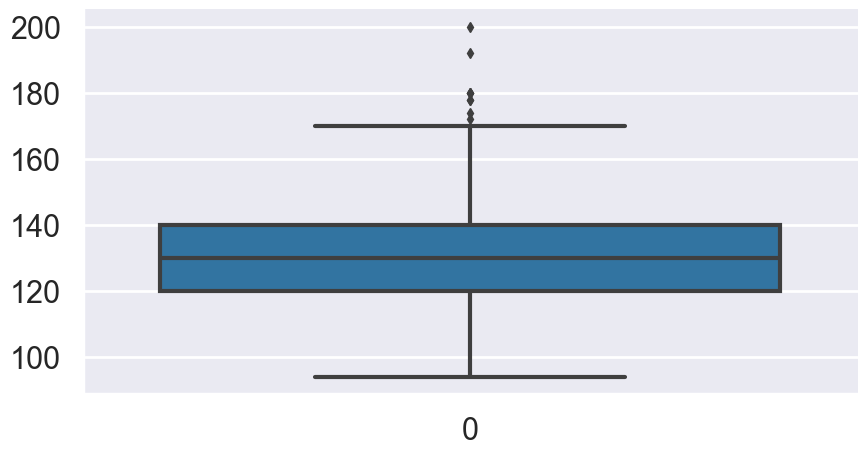

In [9]:
plt.figure(figsize=[10,5])
sns.boxplot(df["trtbps"])
sns.despine()
plt.show()

In [10]:
Q3 = df["trtbps"].quantile(0.95)
df = df[df["trtbps"] <= Q3]

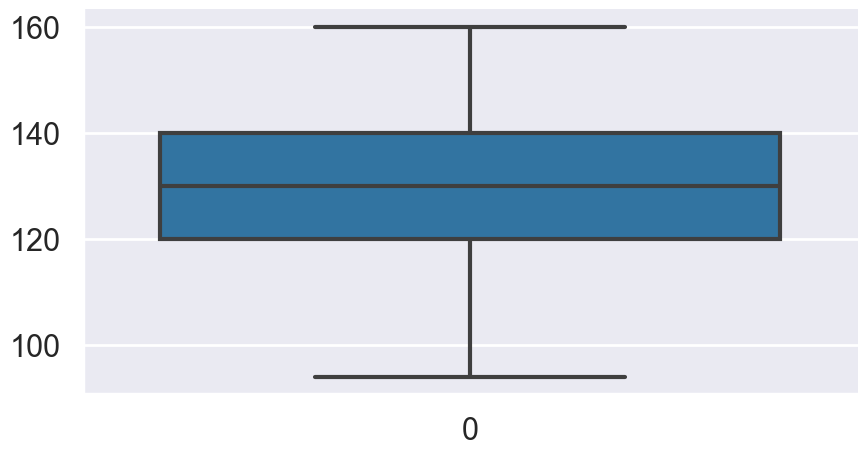

In [11]:
plt.figure(figsize=[10,5])
sns.boxplot(df["trtbps"])
sns.despine()
plt.show()

### Наличие выбросов в показателях холестерина

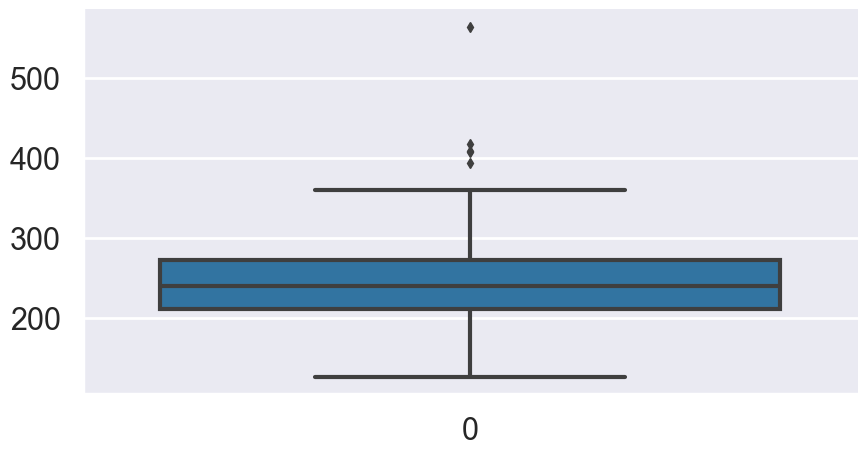

In [12]:
plt.figure(figsize=[10,5])
sns.boxplot(df["chol"])
sns.despine()
plt.show()

В случае с холестерином есть слишком большой выброс, который имеет смысл удалить

In [13]:
Q3 = df["chol"].quantile(0.95)
df = df[df["chol"] <= Q3]

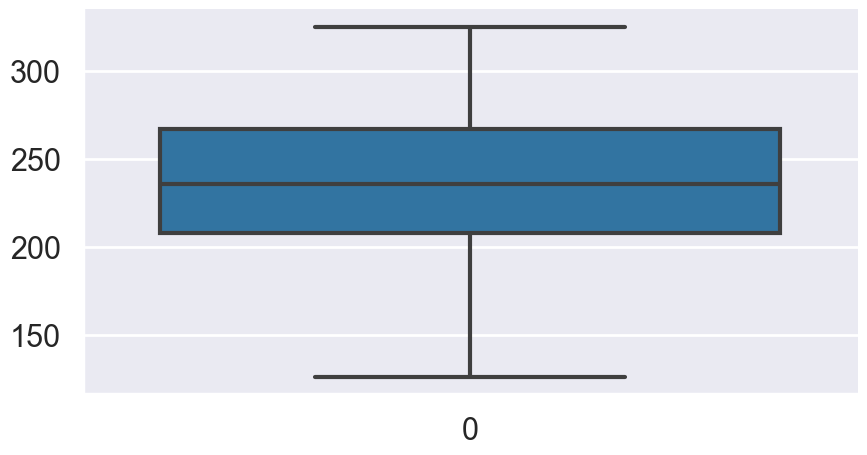

In [14]:
plt.figure(figsize=[10,5])
sns.boxplot(df["chol"])
sns.despine()
plt.show()

### Оцениваем риск в зависимости от высокого уровня сахара

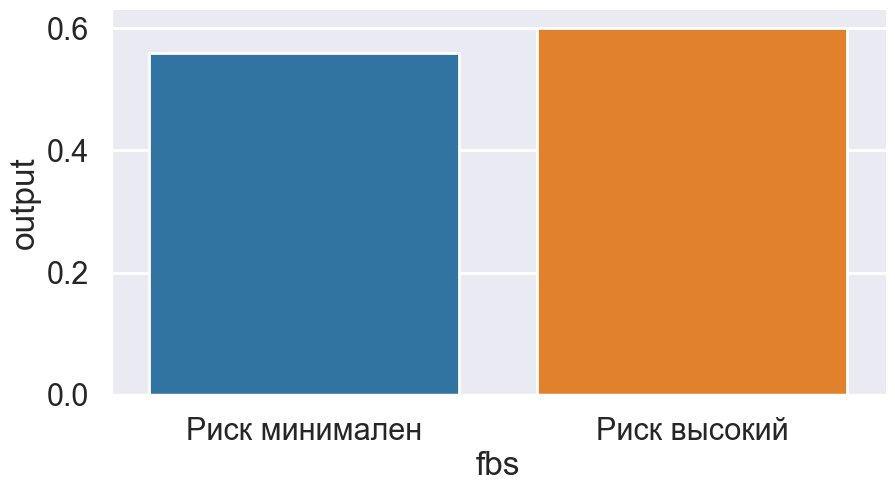

In [15]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["fbs"], y = df["output"], ci=0)
plt.xticks(ticks=[0,1], labels=['Риск минимален','Риск высокий'])
sns.despine()
plt.show()

Существенных отличий в колонках нет

### Проверка выбросов в показателях ЭКГ

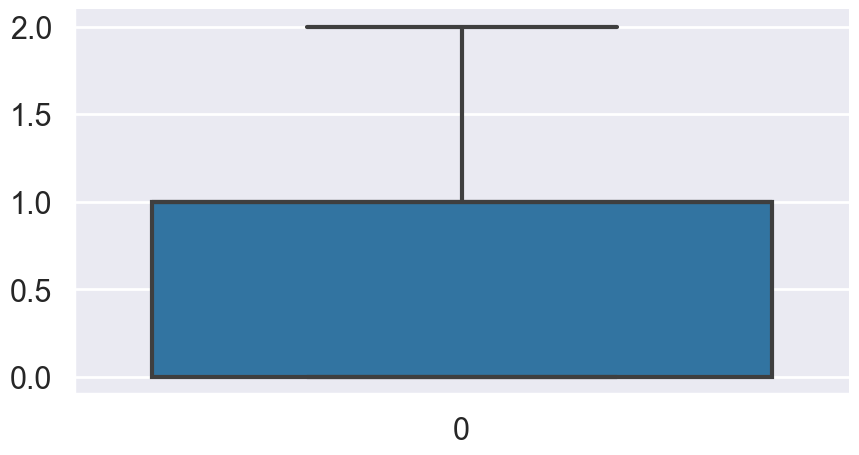

In [16]:
plt.figure(figsize=[10,5])
sns.boxplot(df["restecg"])
sns.despine()
plt.show()

### Поиск выбросов в показателях максимально достигнутых АД

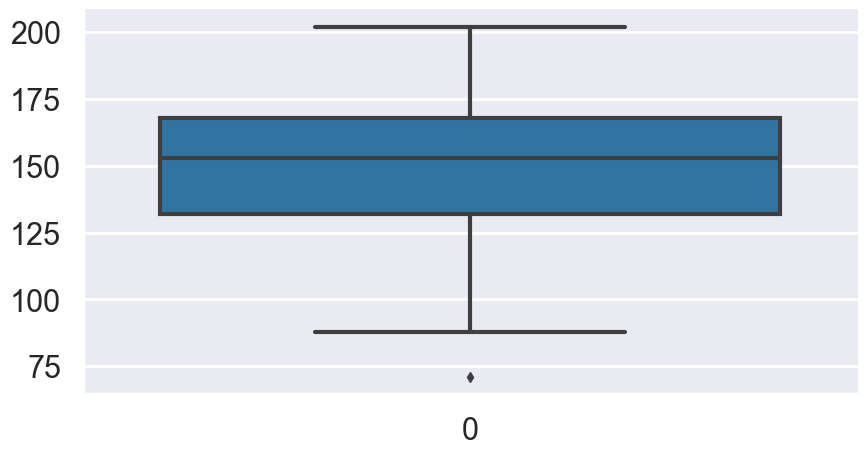

In [17]:
plt.figure(figsize=[10,5])
sns.boxplot(df["thalachh"])
sns.despine()
plt.show()

### Оценка зависимости риска от стенокардии

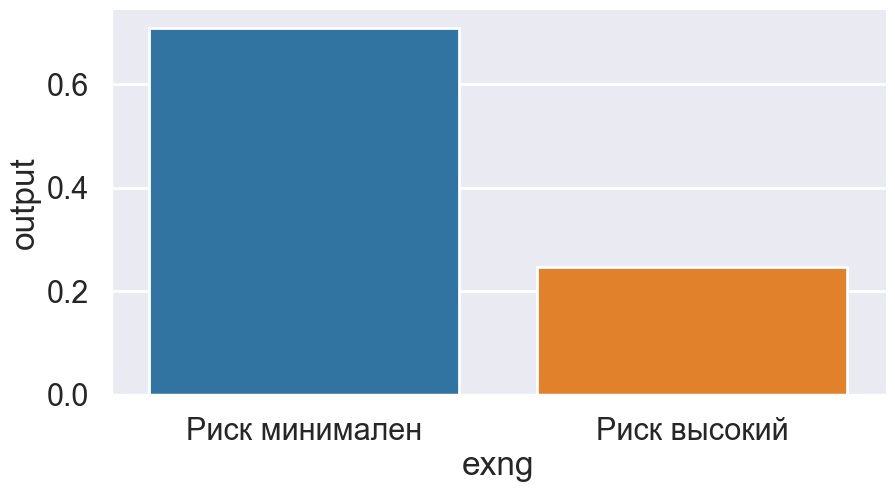

In [18]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["exng"], y = df["output"], ci=0)
plt.xticks(ticks=[0,1], labels=['Риск минимален','Риск высокий'])
sns.despine()
plt.show()

Риск сердечного приступа из-за стенокардии минимален

### Поиск выбросов в показателях средечной наргрузки после физических упражнений (oldpeak)

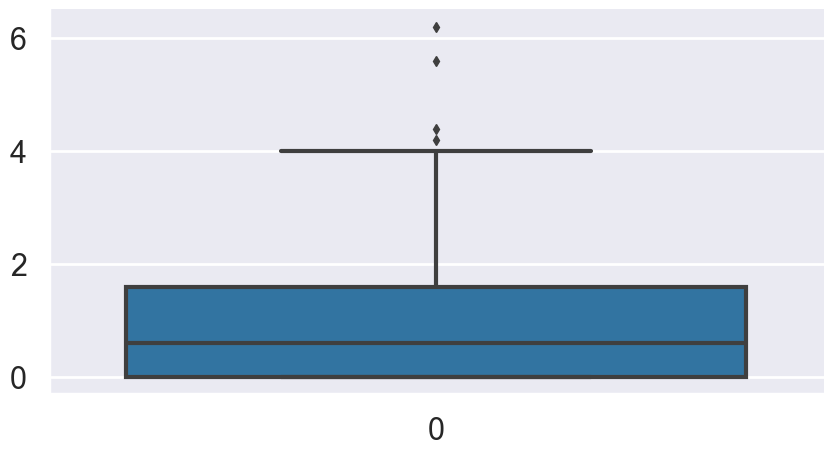

In [19]:
plt.figure(figsize=[10,5])
sns.boxplot(df["oldpeak"])
sns.despine()
plt.show()

In [20]:
Q3 = df["oldpeak"].quantile(0.95)
df = df[df["oldpeak"] <= Q3]

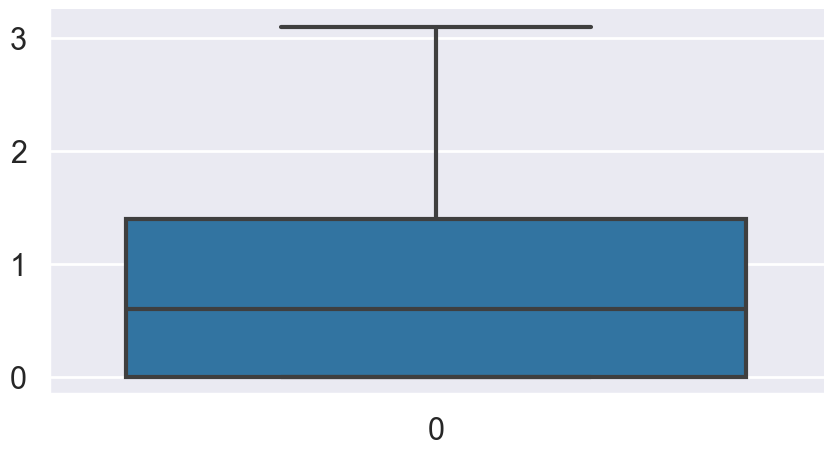

In [21]:
plt.figure(figsize=[10,5])
sns.boxplot(df["oldpeak"])
sns.despine()
plt.show()

## Построение модели

In [22]:
y = df.pop("output")
X = df

## Разбиение данных на обучающие и тестовые в отношении 80% к 20%

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

In [24]:
X_train.shape, y_train.shape

((207, 13), (207,))

## Формирование дерева классификации

In [25]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=42)

## Обучение модели

In [26]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

### Матрица оценки качества модели

In [27]:
print("Матрица ошибок для тренировочного сета:\n")
print(confusion_matrix(y_train, y_train_pred))
print("Матрица ошибок для тестового сета:\n")
print(confusion_matrix(y_test, y_test_pred))

Матрица ошибок для тренировочного сета:

[[ 74  14]
 [ 17 102]]
Матрица ошибок для тестового сета:

[[14  4]
 [10 24]]


## Оценка показателей качества модели

### Accuracy — доля правильных ответов алгоритма

In [28]:
print(str(accuracy_score(y_test, y_test_pred)))

0.7307692307692307


### Precision - доля объектов, названных классификатором положительными и при этом действительно являющимися положительными

In [29]:
print(str(precision_score(y_test, y_test_pred)))

0.8571428571428571


### Recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

In [30]:
print(str(recall_score(y_test, y_test_pred)))

0.7058823529411765


## Визуализация полученного дерева

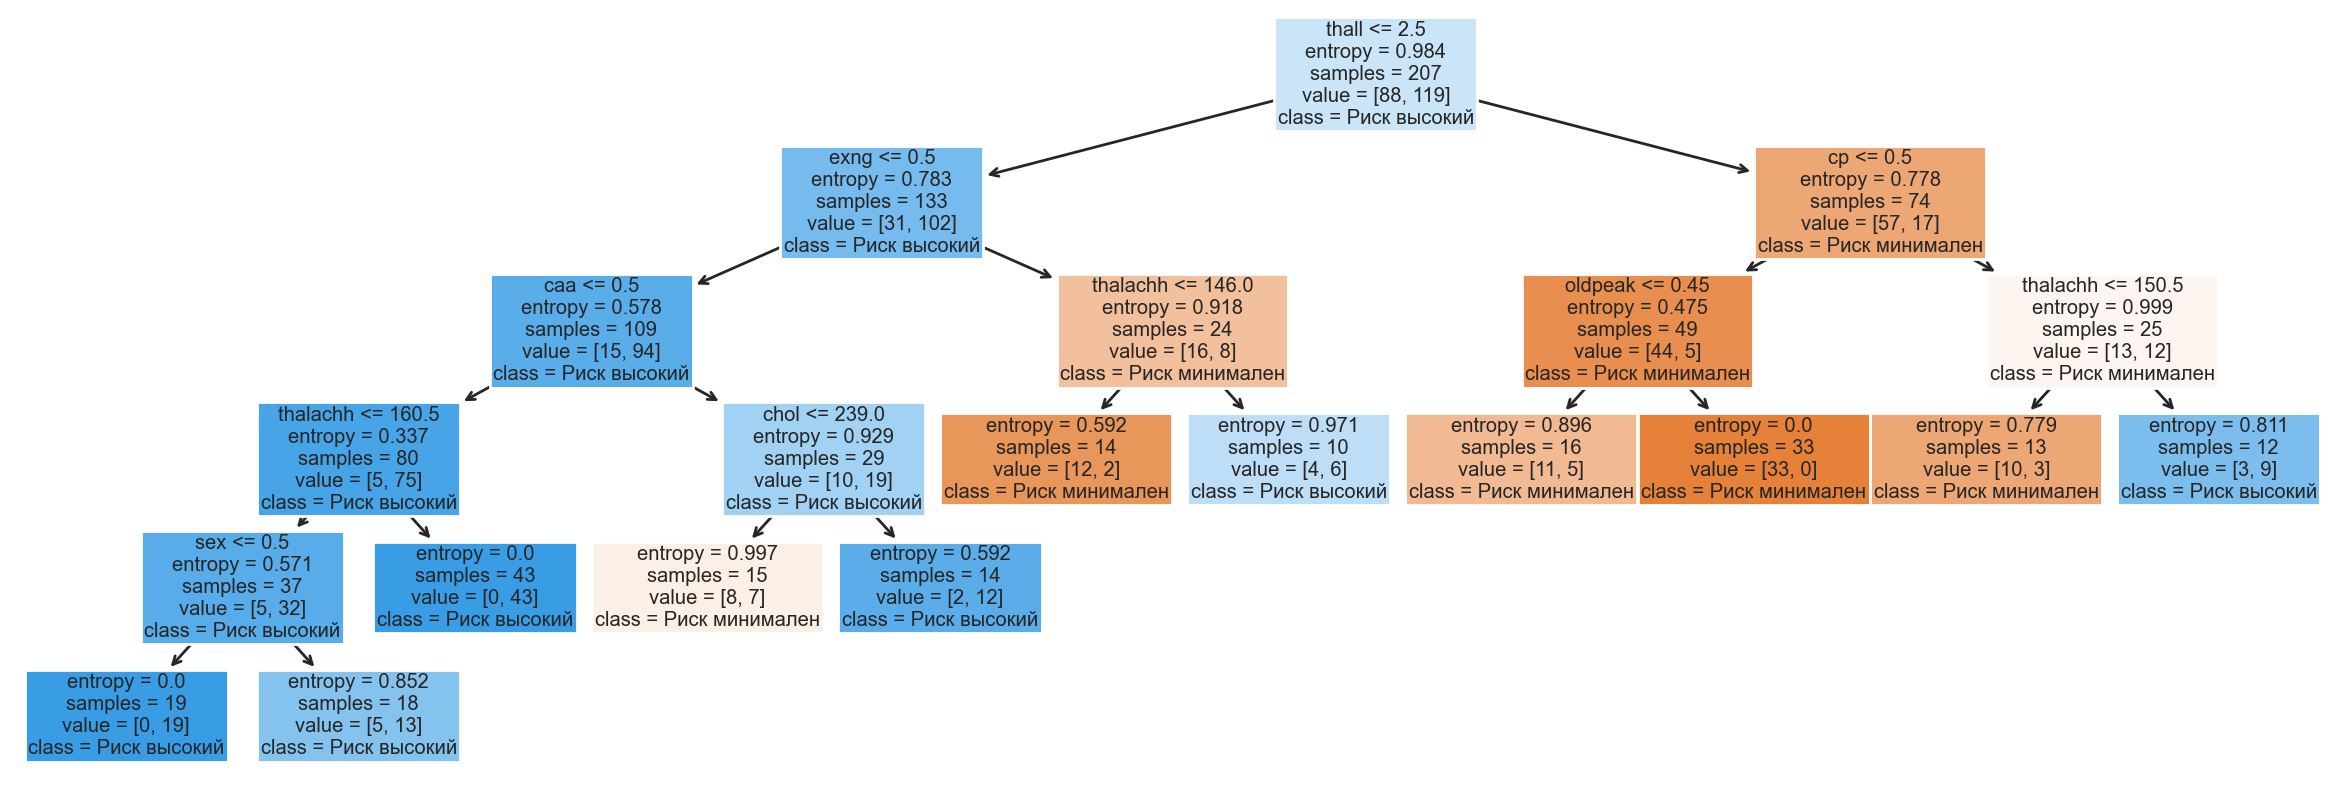

In [31]:
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names = X.columns, class_names=['Риск минимален', "Риск высокий"], filled=True);

* У человека независимо от пола, скорее всего, случится сердечный приступ, если уровень боли в груди равен 1 и выше.
* Если боль в груди больше 1 или более, мужчины подвергаются большему риску, чем женщины.
* Если частота сердечных сокращений больше в сочетании с болью в груди не менее 1 уровня, то у субъекта определенно будет сердечный приступ.
* Если уровень боли в груди ниже 1, даже в этом случае, если у субъекта есть стенокардия, вызванная физическими упражнениями, пациент подвергается большему риску сердечного приступа.

In [32]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [33]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [34]:
print(str(accuracy_score(y_test, y_test_pred)))
print(str(precision_score(y_test, y_test_pred)))
print(str(recall_score(y_test, y_test_pred)))

0.75
0.92
0.6764705882352942


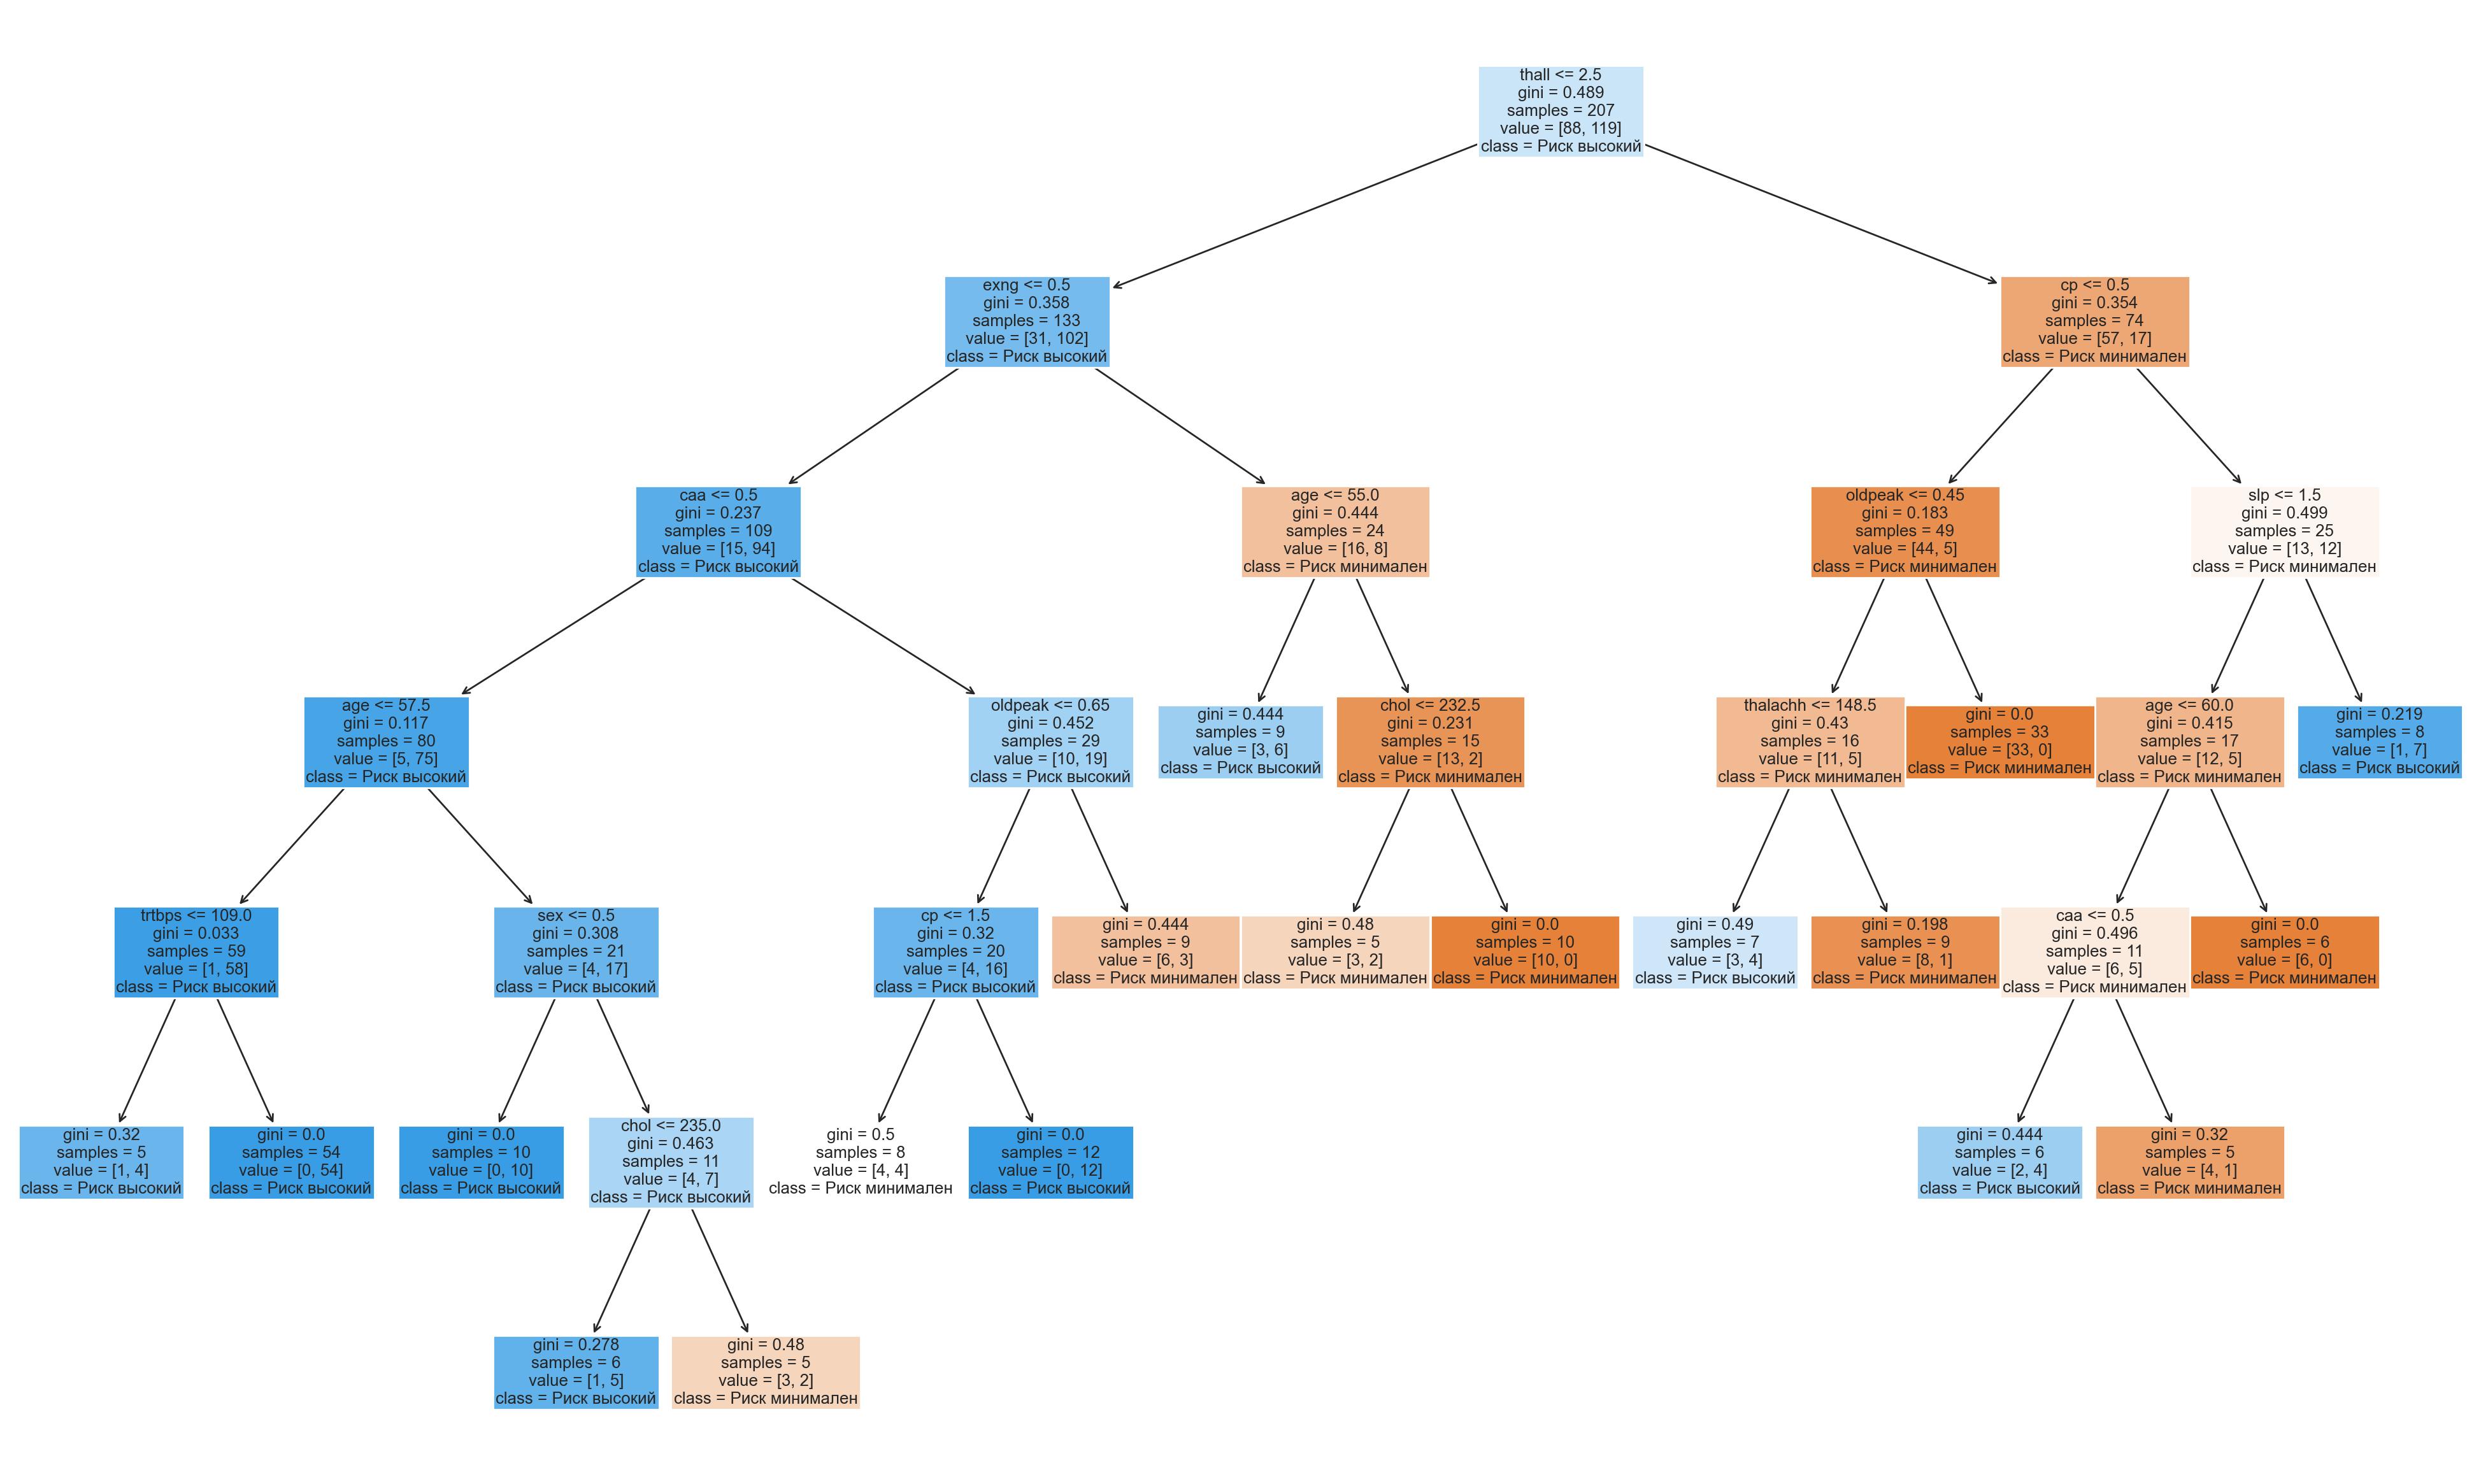

In [35]:
plt.figure(figsize=(50,30))
plot_tree(dt, feature_names = X.columns, class_names=['Риск минимален', "Риск высокий"], filled=True);

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [38]:
print(str(accuracy_score(y_test, y_test_pred)))
print(str(precision_score(y_test, y_test_pred)))
print(str(recall_score(y_test, y_test_pred)))

0.6923076923076923
0.78125
0.7352941176470589


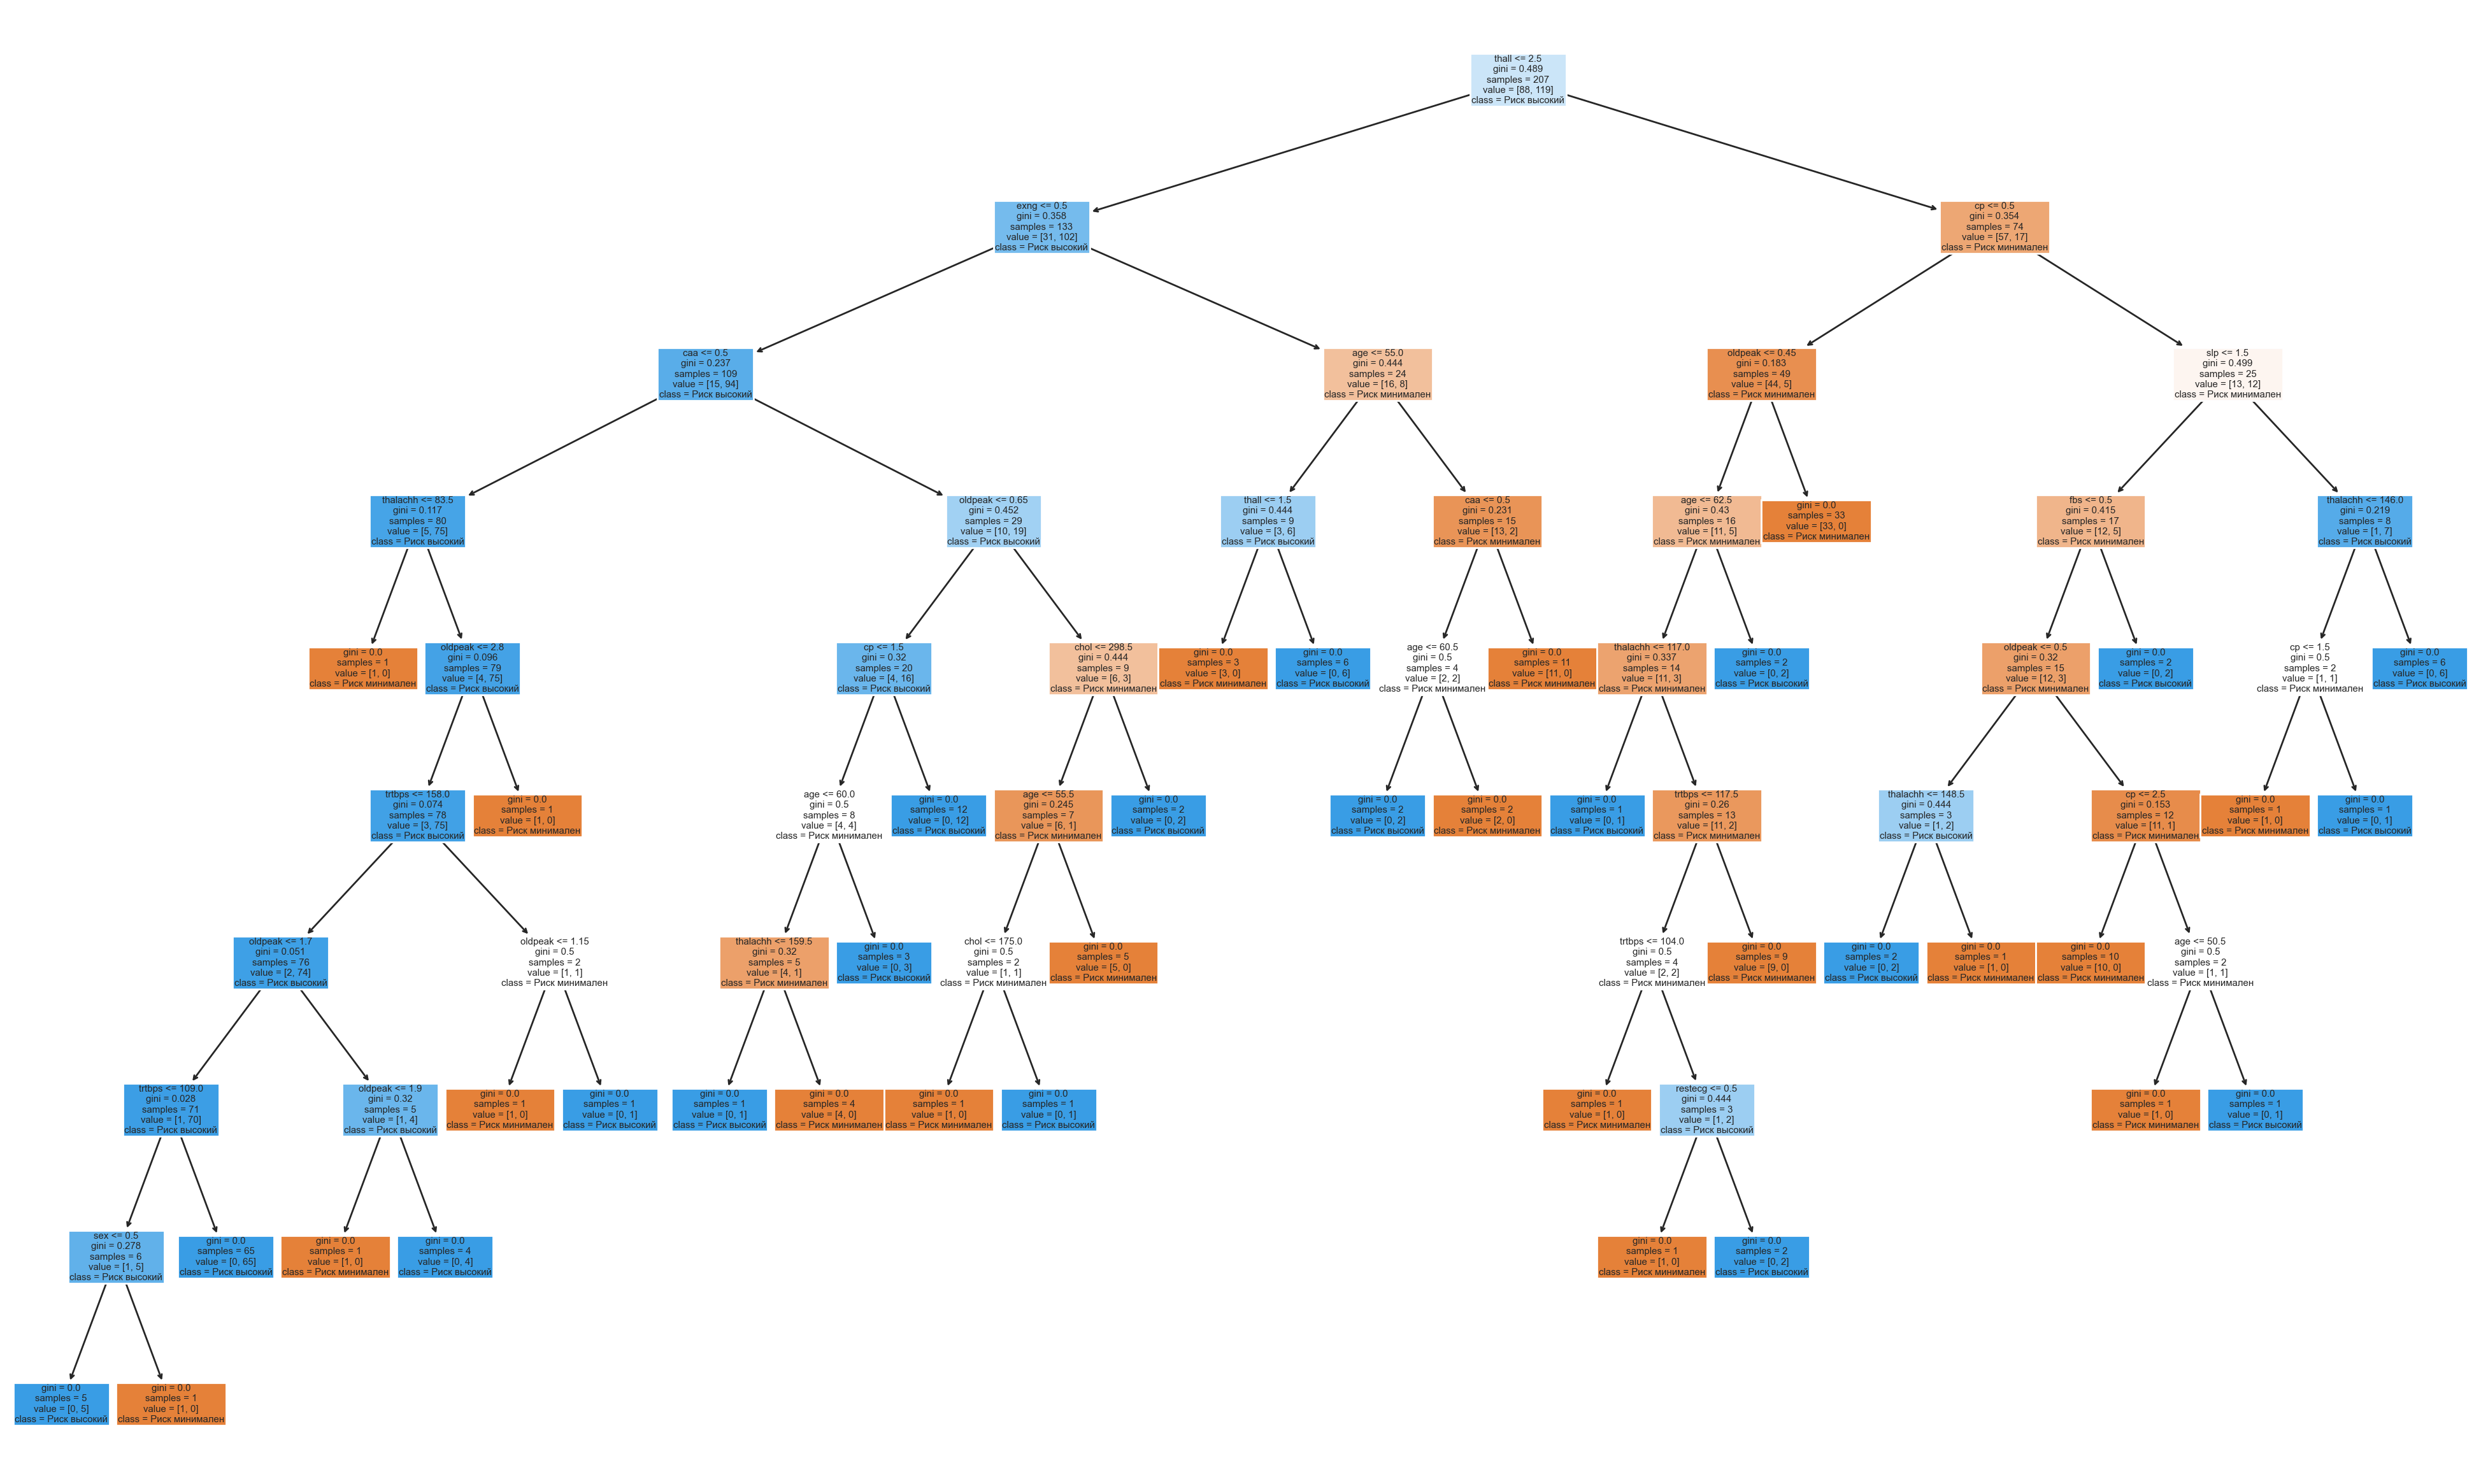

In [39]:
plt.figure(figsize=(50,30))
plot_tree(dt, feature_names = X.columns, class_names=['Риск минимален', "Риск высокий"], filled=True);

## Random Forest классификатор с заданными параметрами

In [40]:
rf = RandomForestClassifier(n_estimators=70, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

### Оценка качества модели

In [41]:
rf_pred = rf.predict(X_test)

In [42]:
print(str(accuracy_score(y_test, rf_pred)))
print(str(precision_score(y_test, rf_pred)))
print(str(recall_score(y_test, rf_pred)))

0.8076923076923077
0.9285714285714286
0.7647058823529411


### Параметры по умолчанию

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
rf_pred = rf.predict(X_test)

### Оценка качества модели

In [45]:
print(str(accuracy_score(y_test, rf_pred)))
print(str(precision_score(y_test, rf_pred)))
print(str(recall_score(y_test, rf_pred)))

0.8653846153846154
0.9655172413793104
0.8235294117647058
